#### AIRLINE ARRIVALS
##### Content
###### 0.Import library & Utils
###### 1.Descriptive analysis
###### 2.Apply model: Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting (XGBoost,LightGBM,Cat-Boost) & SVM.
###### 3.Apply feature selection with PCA, SelectKBest, RFE.
###### 4.Using GridSearchCV to obtain best paramenters for model.
###### 5.Conclusion & comparing performance among models.

#### 0.IMPORT LIBRARY & UTILS

In [ ]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def weekday_name(x):
  if int(x)==1:
    return "Sun"
  elif int(x)==2:
    return "Mon"
  elif int(x)==3:
    return "Tue"
  elif int(x)==4:
    return "Wed"
  elif int(x)==5:
    return "Thu"
  elif int(x)==6:
    return "Fri"
  elif int(x)==7:
    return "Sat"

def weekno(x):
  if int(x)>=1 and int(x)<=7:
    return "w1"
  elif int(x)>7 and int(x)<=14:
    return "w2"
  elif int(x)>14 and int(x)<=21:
    return "w3"
  elif int(x)>21 and int(x)<=31:
    return "w4"

def season_name(x):
  if int(x)>=1 and int(x)<=3:
    return "spring"
  elif int(x)>=4 and int(x)<=6:
    return "summer"
  elif int(x)>=7 and int(x)<=9:
    return "autumn"
  elif int(x)>=10 and int(x)<=12:
    return "winter"

def origin_grp(x):
  if x in origin1:
    return "g1"
  elif x in origin2:
    return "g2"
  elif x in origin3:
    return "g3"
  elif x in origin4:
    return "g4"

def dest_grp(x):
  if x in dest1:
    return "g1"
  elif x in dest2:
    return "g2"
  elif x in dest3:
    return "g3"
  elif x in dest4:
    return "g4"

def col_filtering(df,col):
  list_col = ['Lattitude','Longtitude']
  if col in list_col:
    temp_list = df
    temp_list[col] = round(abs(temp_list[col]),4)
    temp_list = temp_list[temp_list[col]>0]
  else:
    temp_list = df[df[col]>0]
  return temp_list

def scaleColumns(df_scale, cols_to_scale):
    for col in cols_to_scale:
      minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
      df_scale[col] = pd.DataFrame(minmax_scaler.fit_transform(pd.DataFrame(df_scale[col])),columns=[col])
      df_scale[col].fillna(0,inplace=True)
    return df_scale
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    return accuracy_score(y_true, y_pred)


#### 1.DESCRIPTIVE ANALYSIS
#####+ Import data.
#####+ Draftly stats on flight frequency.
#####+ Handle missing value & transform catgorical vars.
#####+ Check correlation & distribution & outlier.

###### Import data

In [ ]:
os.getcwd()
df1 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival1.csv')
df2 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival2.csv')
df_ = pd.concat([df1,df2])
del df1
del df2
df_.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3634338, 110)

In [ ]:
df_.drop(df_.iloc[:, 77:110], inplace=True, axis=1)

In [ ]:
df3 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival3.csv')
df3.drop(df3.iloc[:, 77:110], inplace=True, axis=1)
df__ = pd.concat([df_,df3])
del df3
del df_
df__.shape
df__.info(verbose=True,null_counts=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557807 entries, 0 to 1923468
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             5557807 non-null  int64  
 1   Quarter                          5557807 non-null  int64  
 2   Month                            5557807 non-null  int64  
 3   DayofMonth                       5557807 non-null  int64  
 4   DayOfWeek                        5557807 non-null  int64  
 5   FlightDate                       5557807 non-null  object 
 6   Reporting_Airline                5557807 non-null  object 
 7   DOT_ID_Reporting_Airline         5557807 non-null  int64  
 8   IATA_CODE_Reporting_Airline      5557807 non-null  object 
 9   Tail_Number                      5541392 non-null  object 
 10  Flight_Number_Reporting_Airline  5557807 non-null  int64  
 11  OriginAirportID                  5557807 non-null 

In [ ]:
df4 = pd.read_csv('drive/My Drive/assign5_aa/airline_arrival4.csv')
df4.drop(df4.iloc[:, 77:110], inplace=True, axis=1)
df = pd.concat([df__,df4])
del df4
del df__
df.info(verbose=True,null_counts=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48,69,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422037 entries, 0 to 1864229
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             7422037 non-null  int64  
 1   Quarter                          7422037 non-null  int64  
 2   Month                            7422037 non-null  int64  
 3   DayofMonth                       7422037 non-null  int64  
 4   DayOfWeek                        7422037 non-null  int64  
 5   FlightDate                       7422037 non-null  object 
 6   Reporting_Airline                7422037 non-null  object 
 7   DOT_ID_Reporting_Airline         7422037 non-null  int64  
 8   IATA_CODE_Reporting_Airline      7422037 non-null  object 
 9   Tail_Number                      7404200 non-null  object 
 10  Flight_Number_Reporting_Airline  7422037 non-null  int64  
 11  OriginAirportID                  7422037 non-null 

###### Draftly stats on flight frequency.

In [ ]:
# re-screen all columns to remove duplicated with different format and pick target vars
df = df[['ArrDelay','Cancelled','Diverted','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime',
           'DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance',
           'Reporting_Airline','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay',
           'WeatherDelay','CarrierDelay','TaxiIn','TaxiOut']]
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7422037 entries, 0 to 1864229
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ArrDelay           7268232 non-null  float64
 1   Cancelled          7422037 non-null  int64  
 2   Diverted           7422037 non-null  int64  
 3   ActualElapsedTime  7268232 non-null  float64
 4   CRSArrTime         7422037 non-null  int64  
 5   ArrTime            7284391 non-null  float64
 6   DepTime            7291951 non-null  float64
 7   CRSDepTime         7422037 non-null  int64  
 8   DepDelay           7291927 non-null  float64
 9   Cancelled          7422037 non-null  int64  
 10  Month              7422037 non-null  int64  
 11  DayofMonth         7422037 non-null  int64  
 12  DayOfWeek          7422037 non-null  int64  
 13  Distance           7422037 non-null  int64  
 14  Reporting_Airline  7422037 non-null  object 
 15  Origin             7422037 non-n

In [ ]:
df.head(10)

,ArrDelay,Cancelled,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,Reporting_Airline,Origin,Dest,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut
0,-26.0,0,0,51.0,1510,1444.0,1353.0,1400,-7.0,0,1,4,5,190,OO,SBP,SFO,NaN,NaN,NaN,NaN,NaN,5.0,9.0
1,1.0,0,0,109.0,1118,1119.0,930.0,935,-5.0,0,1,4,5,438,OO,IAH,XNA,NaN,NaN,NaN,NaN,NaN,6.0,27.0
2,-17.0,0,0,121.0,855,838.0,637.0,643,-6.0,0,1,4,5,513,OO,SGF,IAH,NaN,NaN,NaN,NaN,NaN,16.0,17.0
3,-29.0,0,0,110.0,1433,1404.0,1314.0,1335,-21.0,0,1,4,5,576,OO,ISN,DEN,NaN,NaN,NaN,NaN,NaN,7.0,23.0
4,-31.0,0,0,163.0,1040,1009.0,826.0,836,-10.0,0,1,4,5,896,OO,MKE,DEN,NaN,NaN,NaN,NaN,NaN,10.0,26.0
5,-12.0,0,0,134.0,1826,1814.0,1600.0,1610,-10.0,0,1,4,5,679,OO,SEA,SFO,NaN,NaN,NaN,NaN,NaN,3.0,21.0
6,3.0,0,0,105.0,1856,1859.0,1614.0,1615,-1.0,0,1,4,5,522,OO,SFO,BOI,NaN,NaN,NaN,NaN,NaN,4.0,29.0
7,-14.0,0,0,93.0,1240,1226.0,1053.0,1045,8.0,0,1,4,5,524,OO,BZN,DEN,NaN,NaN,NaN,NaN,NaN,8.0,14.0
8,-2.0,0,0,85.0,751,749.0,624.0,637,-13.0,0,1,4,5,190,OO,SBP,SFO,NaN,NaN,NaN,NaN,NaN,4.0,44.0
9,1.0,0,0,129.0,1107,1108.0,759.0,803,-4.0,0,1,4,5,641,OO,DEN,DFW,NaN,NaN,NaN,NaN,NaN,15.0,19.0


In [ ]:
df.describe()

,ArrDelay,Cancelled,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut
count,7.268232e+06,7.422037e+06,7.422037e+06,7.268232e+06,7.422037e+06,7.284391e+06,7.291951e+06,7.422037e+06,7.291927e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,7.422037e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,1.389253e+06,7.284390e+06,7.288060e+06
mean,5.414849e+00,1.817897e-02,2.543776e-03,1.366903e+02,1.485790e+03,1.462955e+03,1.334606e+03,1.330259e+03,1.092327e+01,1.817897e-02,6.578750e+00,1.573196e+01,3.937155e+00,8.005442e+02,9.608329e-02,1.658795e+01,2.740748e+01,3.802404e+00,2.112859e+01,7.740776e+00,1.738935e+01
std,5.106666e+01,1.335983e-01,5.037167e-02,7.261274e+01,5.214659e+02,5.424542e+02,5.071998e+02,4.929855e+02,4.895964e+01,1.335983e-01,3.402585e+00,8.762183e+00,1.995814e+00,5.925118e+02,3.358346e+00,3.966440e+01,5.345620e+01,3.236297e+01,6.610465e+01,6.194340e+00,1.000398e+01
min,-9.900000e+01,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,-1.500000e+01,0.000000e+00,0.000000e+00,8.400000e+01,1.100000e+03,1.046000e+03,9.140000e+02,9.130000e+02,-5.000000e+00,0.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,3.690000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.100000e+01
50%,-6.000000e+00,0.000000e+00,0.000000e+00,1.190000e+02,1.515000e+03,1.504000e+03,1.327000e+03,1.321000e+03,-2.000000e+00,0.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,6.400000e+02,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.500000e+01
75%,7.000000e+00,0.000000e+00,0.000000e+00,1.670000e+02,1.921000e+03,1.917000e+03,1.746000e+03,1.736000e+03,7.000000e+00,0.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.034000e+03,0.000000e+00,2.000000e+01,3.300000e+01,0.000000e+00,1.800000e+01,9.000000e+00,2.000000e+01
max,2.695000e+03,1.000000e+00,1.000000e+00,1.604000e+03,2.400000e+03,2.400000e+03,2.400000e+03,2.359000e+03,2.710000e+03,1.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,5.095000e+03,1.078000e+03,1.741000e+03,2.206000e+03,1.847000e+03,2.695000e+03,3.160000e+02,2.270000e+02


In [ ]:
pd.crosstab(df['Month'],df['Reporting_Airline'])

Reporting_Airline,9E,AA,AS,B6,DL,EV,F9,G4,HA,MQ,NK,OH,OO,UA,WN,YV,YX
Month,,,,,,,,,,,,,,,,,
1,20198,77017,20744,24443,73836,13195,9647,6763,6798,25699,15222,23169,64926,46915,111312,18346,25755
2,18305,71059,19028,22398,67337,11447,8750,7271,6033,23312,13654,21465,59589,43722,99500,16519,23786
3,22377,80027,21694,25927,84208,12942,9845,10260,6858,26740,17154,24446,70419,53651,119413,18836,27277
4,21030,76765,21300,25329,81949,11300,9819,9283,6900,26176,16774,23984,68502,52292,115401,18171,27048
5,21074,81666,22567,24967,85579,9290,11383,9021,7219,28795,18055,24783,72041,54360,117849,19594,28147
6,21882,80090,23271,24324,87350,9786,11647,11091,7198,28456,17874,24681,72158,54075,115213,19924,27671
7,22312,81801,24593,25545,90812,11182,12535,11786,7334,29565,18845,25249,73742,56106,119342,20122,28158
8,23338,82689,24688,25518,91278,11348,12454,8717,7364,29931,18860,25452,74973,56223,116526,20105,28997
9,20912,77663,21737,24143,81745,11386,12200,5726,6876,27249,16759,23683,68051,52021,109217,19099,27512


In [ ]:
df["Month"].value_counts()

7     659029
8     658461
6     636691
5     636390
10    636014
3     632074
12    625763
4     612023
9     605979
11    602453
1     583985
2     533175
Name: Month, dtype: int64

In [ ]:
df['Reporting_Airline'].value_counts()

WN    1363946
DL     991986
AA     946776
OO     836445
UA     625910
YX     329149
MQ     327007
B6     297411
OH     289304
AS     264816
9E     257132
YV     227888
NK     204845
F9     135543
EV     134683
G4     105305
HA      83891
Name: Reporting_Airline, dtype: int64

In [ ]:
df["Dest"].value_counts()

ATL    395026
ORD    339569
DFW    304346
DEN    252064
CLT    235490
        ...  
HYA        83
GST        82
DLG        82
PGV        80
AKN        61
Name: Dest, Length: 360, dtype: int64

##### Dralfly on what the stats show:
##### 1. Most of airline have stable in flight frequency thourgh month in which WN is dominated among airlines.Additionally,G4 (Allegiant air) showing the unstability on number of flight.
##### 2. ATL/ORD/DFW are the top airport in term of flight frequency for both destinition and departure. (maybe impact to number of delay)

###### Handle missing value & transform catgorical data

In [ ]:
df.isnull().sum()/(df.shape[0])

ArrDelay             0.020723
Cancelled            0.000000
Diverted             0.000000
ActualElapsedTime    0.020723
CRSArrTime           0.000000
ArrTime              0.018546
DepTime              0.017527
CRSDepTime           0.000000
DepDelay             0.017530
Cancelled            0.000000
Month                0.000000
DayofMonth           0.000000
DayOfWeek            0.000000
Distance             0.000000
Reporting_Airline    0.000000
Origin               0.000000
Dest                 0.000000
SecurityDelay        0.812821
NASDelay             0.812821
LateAircraftDelay    0.812821
WeatherDelay         0.812821
CarrierDelay         0.812821
TaxiIn               0.018546
TaxiOut              0.018051
dtype: float64

######> Targeted variable [ArrDelay] have ~2% missing value -> drop null-value rows
######> Other variables with small percentage of missing value (<2%) like ActualElaspsedTime, ArrTime, DepTime, DepDelay, TaxiIn, TaxiOut will be droped on NA rows as well 
######> For variables related to delay like SecurityDelay,.. will be fill as 0 since its nature will be based on ArrDelay and whether flight delay or not.

In [ ]:
drop_missing_row = ['ArrDelay','ActualElapsedTime','ArrTime','DepTime','DepDelay','TaxiIn','TaxiOut']
for c in drop_missing_row:
  df.drop(df[df[c].isnull()].index, inplace=True)
# df.info(verbose=True,null_counts=True)
# print(df.shape)

In [ ]:
fill_na_row = ['SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']
for c in fill_na_row:
  df[c] = df[c].fillna(0).astype(int)
  df[c].fillna(0, inplace=True)

df.info(verbose=True,null_counts=True)
print(df.shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834910 entries, 0 to 1864229
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ArrDelay           6834910 non-null  float64
 1   Cancelled          6834910 non-null  int64  
 2   Diverted           6834910 non-null  int64  
 3   ActualElapsedTime  6834910 non-null  float64
 4   CRSArrTime         6834910 non-null  int64  
 5   ArrTime            6834910 non-null  float64
 6   DepTime            6834910 non-null  float64
 7   CRSDepTime         6834910 non-null  int64  
 8   DepDelay           6834910 non-null  float64
 9   Cancelled          6834910 non-null  int64  
 10  Month              6834910 non-null  int64  
 11  DayofMonth         6834910 non-null  int64  
 12  DayOfWeek          6834910 non-null  int64  
 13  Distance           6834910 non-null  int64  
 14  Reporting_Airline  6834910 non-null  object 
 15  Origin             6834910 non-n

In [ ]:
# Handle catgorical data & datetime
### for categorical date with multiple class -> cut down the group 
### for datetime value -> create new group with season, weekday, week of month
df['weekday'] = df['DayOfWeek'].apply(lambda x: weekday_name(x))
df['weekno'] = df['DayofMonth'].apply(lambda x: weekno(x))
df['season'] = df['Month'].apply(lambda x: season_name(x))

In [ ]:
df.describe(include=['O'])

,Reporting_Airline,Origin,Dest,weekday,weekno,season
count,6834910,6834910,6834910,6834910,6834910,6834910
unique,17,360,360,7,4,4
top,WN,ATL,ATL,Thu,w4,autumn
freq,1243831,369458,369586,1022301,2108261,1774231


In [ ]:
df.drop(['DayOfWeek','DayofMonth','Month',"Cancelled"],axis=1,inplace=True)
df.columns

Index(['ArrDelay', 'Diverted', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime',
       'DepTime', 'CRSDepTime', 'DepDelay', 'Distance', 'Reporting_Airline',
       'Origin', 'Dest', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay',
       'WeatherDelay', 'CarrierDelay', 'TaxiIn', 'TaxiOut', 'weekday',
       'weekno', 'season'],
      dtype='object')

==========Reporting_Airline==========
             counts
count  1.700000e+01
mean   4.020535e+05
std    3.469732e+05
min    7.974400e+04
25%    1.874460e+05
50%    2.643510e+05
75%    5.847720e+05
max    1.243831e+06


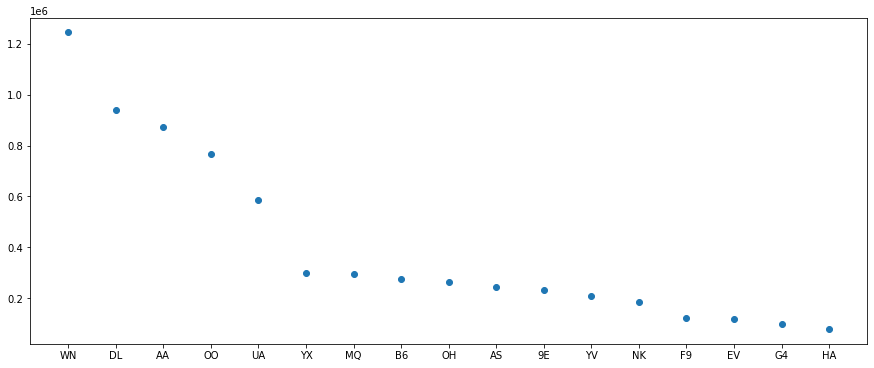

==========Origin==========
              counts
count     360.000000
mean    18985.861111
std     45402.263193
min        55.000000
25%       886.750000
50%      2814.500000
75%     11546.000000
max    369458.000000


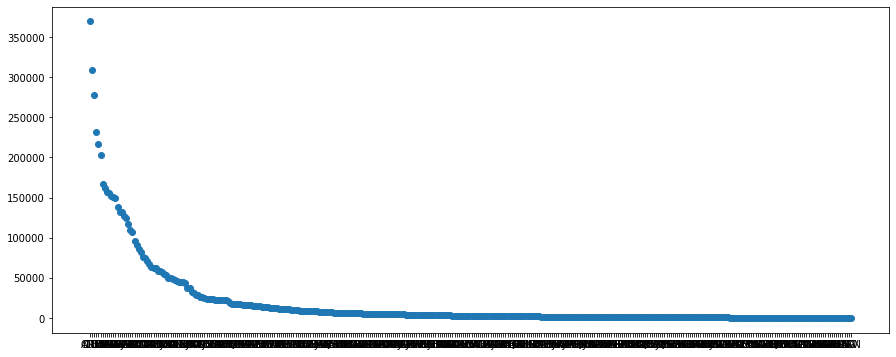

==========Dest==========
              counts
count     360.000000
mean    18985.861111
std     45383.113281
min        58.000000
25%       891.250000
50%      2810.500000
75%     11579.750000
max    369586.000000


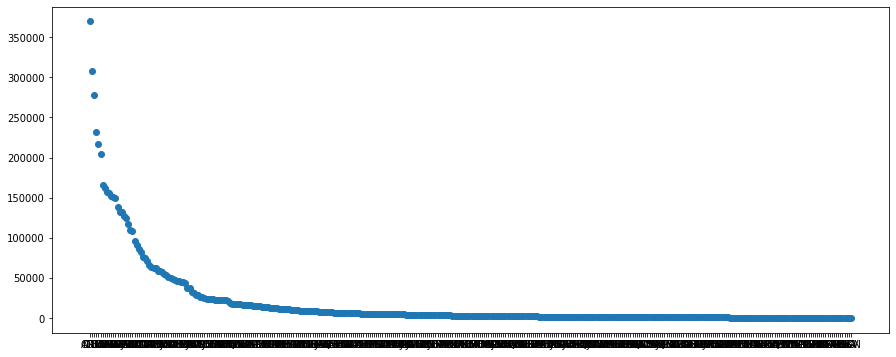

g4    6128985
g3     510584
g2     146931
g1      48410
Name: dest_group, dtype: int64

In [ ]:
plot_col = ['Reporting_Airline','Origin','Dest']
for c in plot_col:
  temp_df = df[c].value_counts().rename_axis('unique_values').reset_index(name='counts')
  print("==========" + c + "==========")
  print(temp_df.describe())
  plt.figure(figsize=(15,6))
  plt.scatter(temp_df['unique_values'],temp_df['counts'])
  plt.show()
# origin shorten
temp_df = df
temp_df1 = temp_df['Origin'].value_counts().rename_axis('unique_values').reset_index(name='counts')
origin1 = list(temp_df1[temp_df1['counts']<=886]['unique_values'])
origin2 = list(temp_df1[(temp_df1['counts']>886) & (temp_df1['counts']<=2800)]['unique_values'])
origin3 = list(temp_df1[(temp_df1['counts']>2800) & (temp_df1['counts']<=11500)]['unique_values'])
origin4 = list(temp_df1[temp_df1['counts']>11500]['unique_values'])
df['org_group'] = df['Origin'].apply(lambda x:origin_grp(x))

temp_df2 = temp_df['Dest'].value_counts().rename_axis('unique_values').reset_index(name='counts')
dest1 = list(temp_df2[temp_df2['counts']<=891]['unique_values'])
dest2 = list(temp_df2[(temp_df2['counts']>891) & (temp_df2['counts']<=2810)]['unique_values'])
dest3 = list(temp_df2[(temp_df2['counts']>2810) & (temp_df2['counts']<=11500)]['unique_values'])
dest4 = list(temp_df2[temp_df2['counts']>11500]['unique_values'])
df['dest_group'] = df['Dest'].apply(lambda x:dest_grp(x))

del temp_df
del temp_df1
del temp_df2
df.drop(['Origin','Dest'],axis=1,inplace=True)
df['dest_group'].value_counts()

###### Check correlation & distribution & outlier

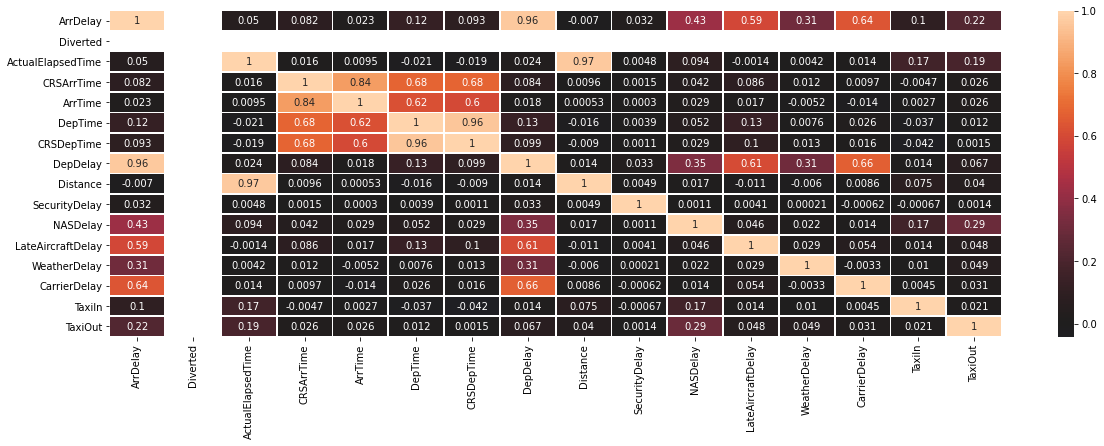

In [ ]:
#Correlation
plt.figure(figsize=(20,6))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0,  annot= True, linewidths=0.8 )

######+ Check for strong correlation variables (excluded ArrDelay)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will b

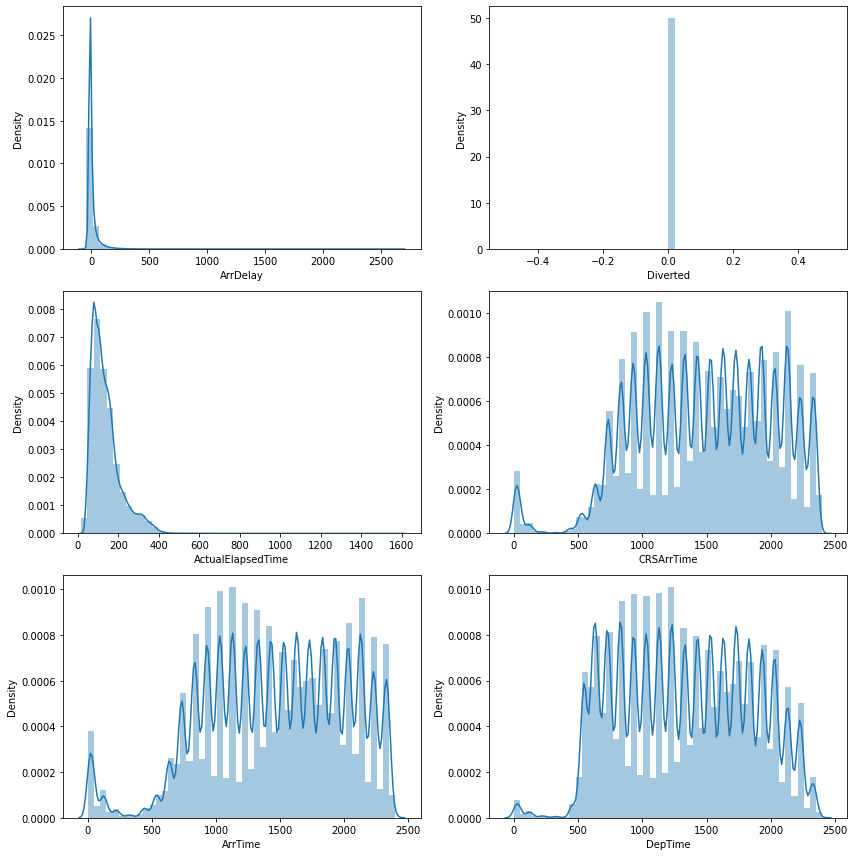

In [ ]:
# distribution
list_of_col = df.select_dtypes(include=['float64','int64']).columns.tolist()
fig,ax = plt.subplots(3,2, figsize=(12,12)) 
i=0 
for x in range(3):
    for y in range(2):
        sns.distplot(df[list_of_col[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

###### add boxplot of target var on dattime and carriers

=========weekday=========


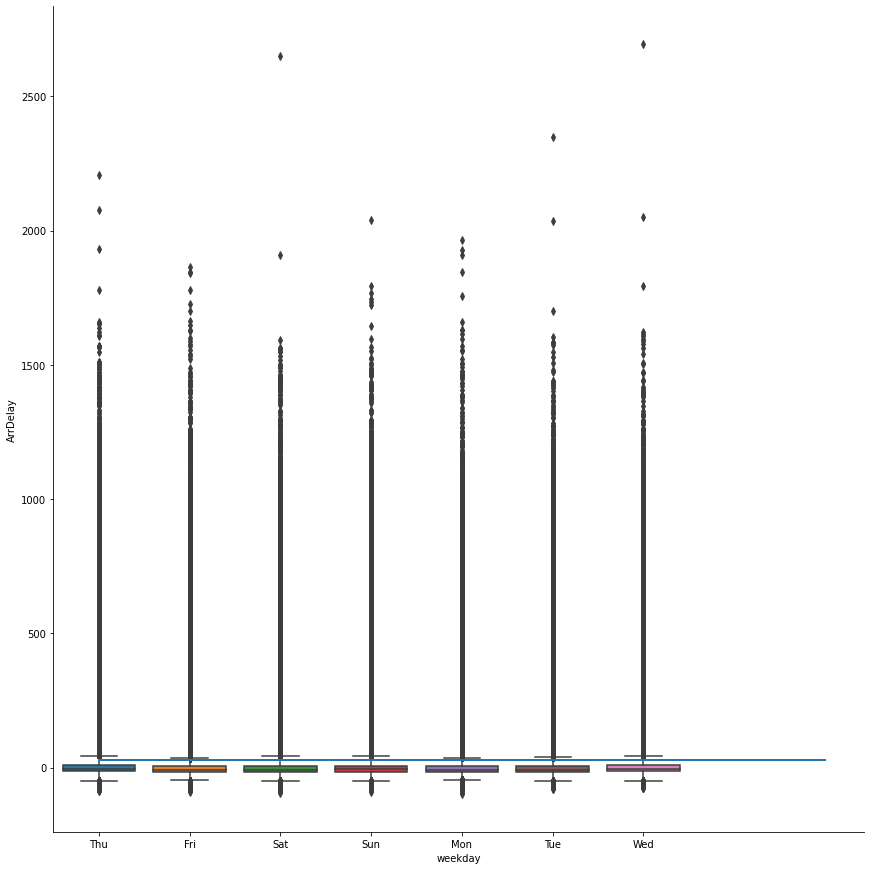

=========weekno=========


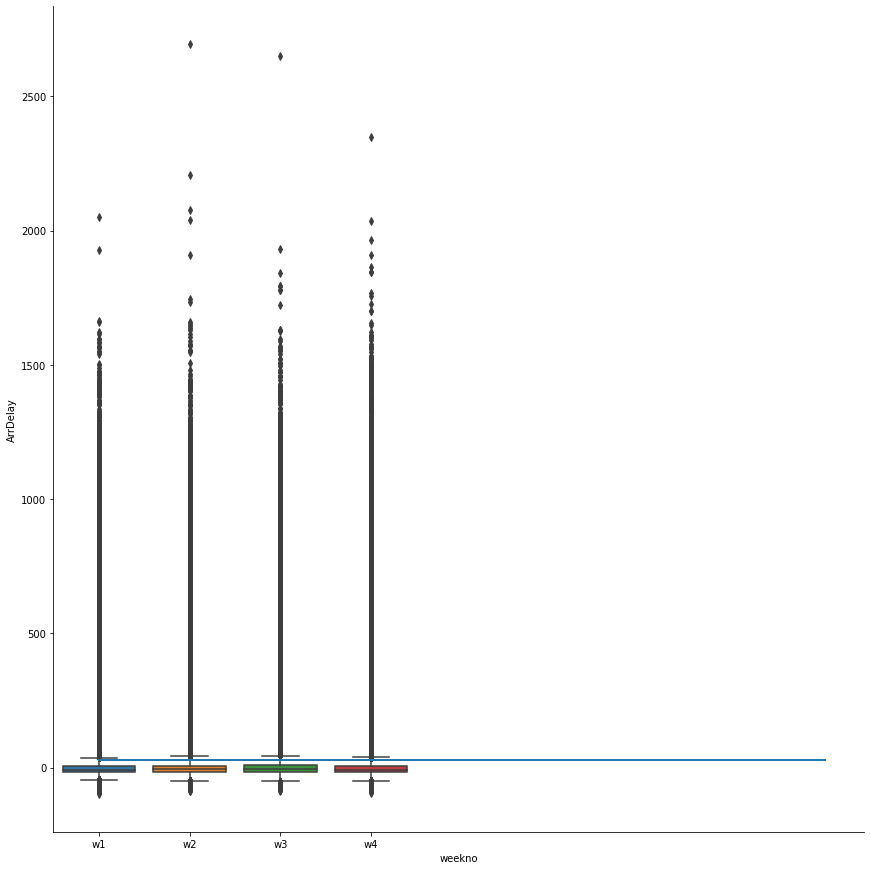

=========season=========


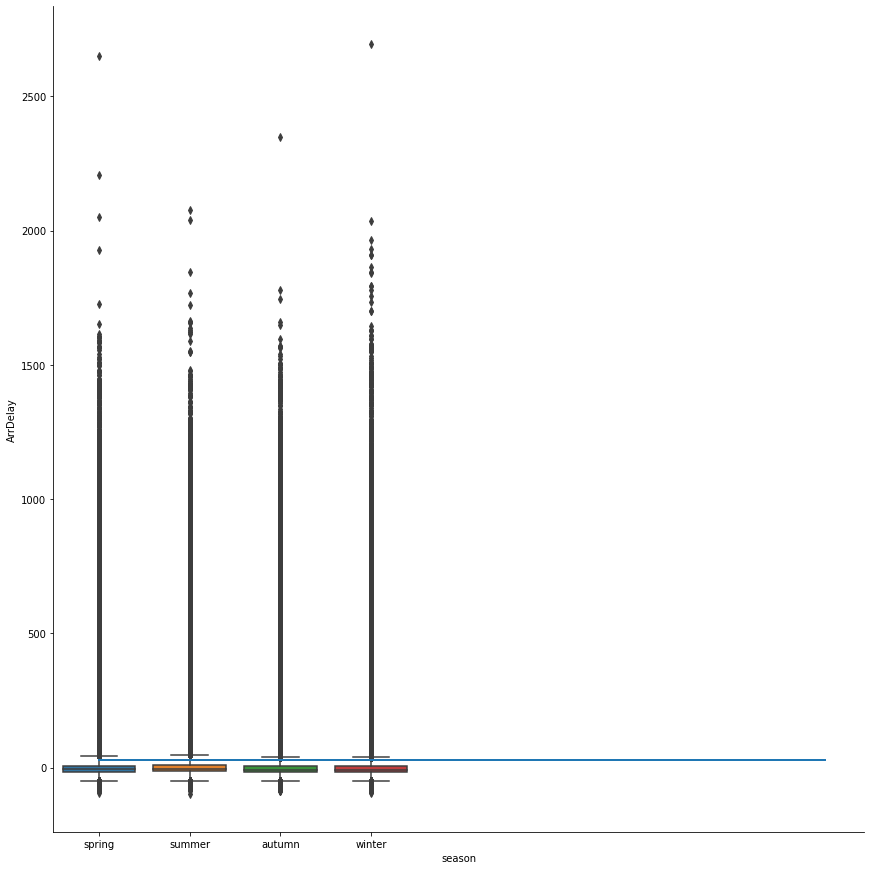

=========Reporting_Airline=========


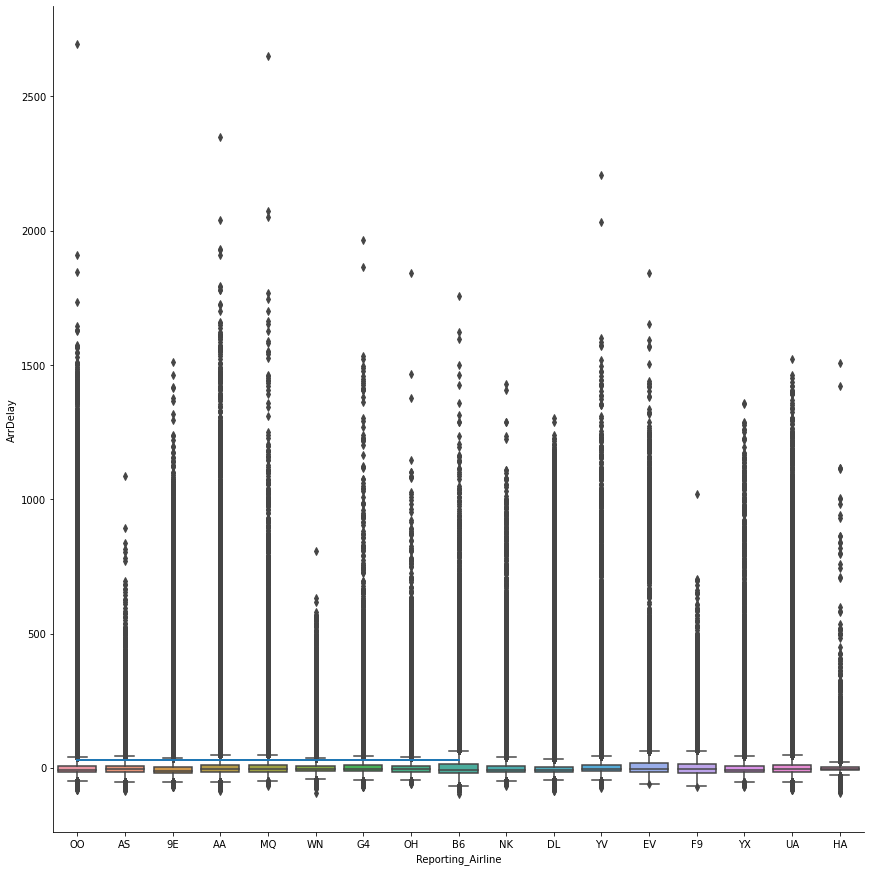

=========org_group=========


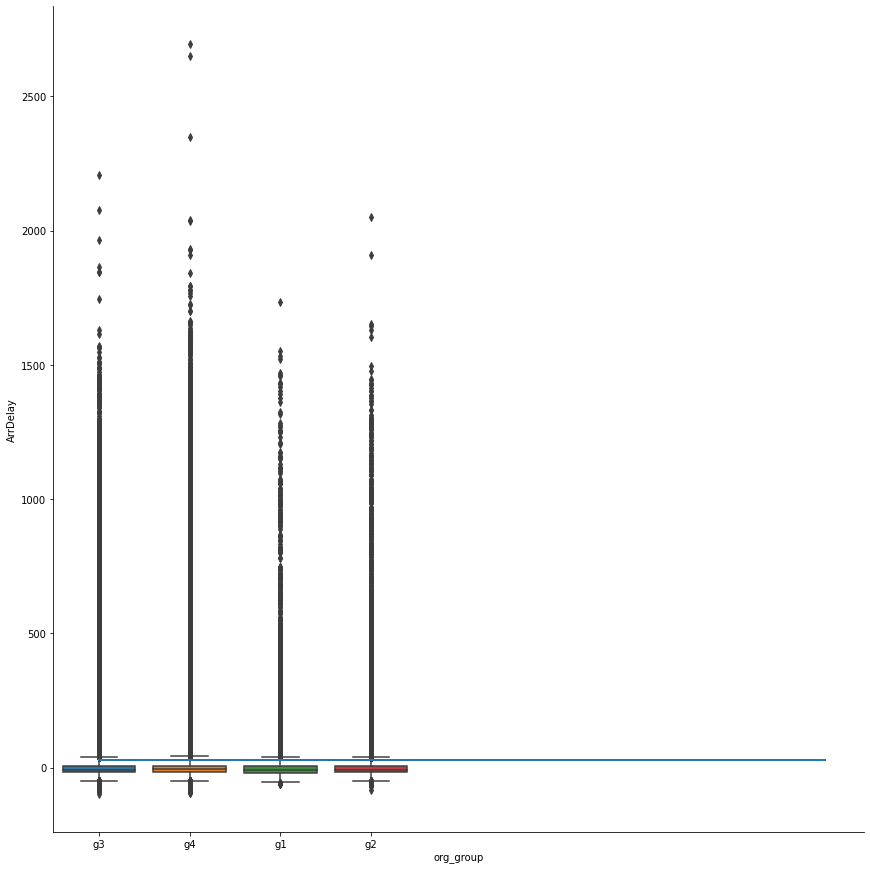

=========dest_group=========


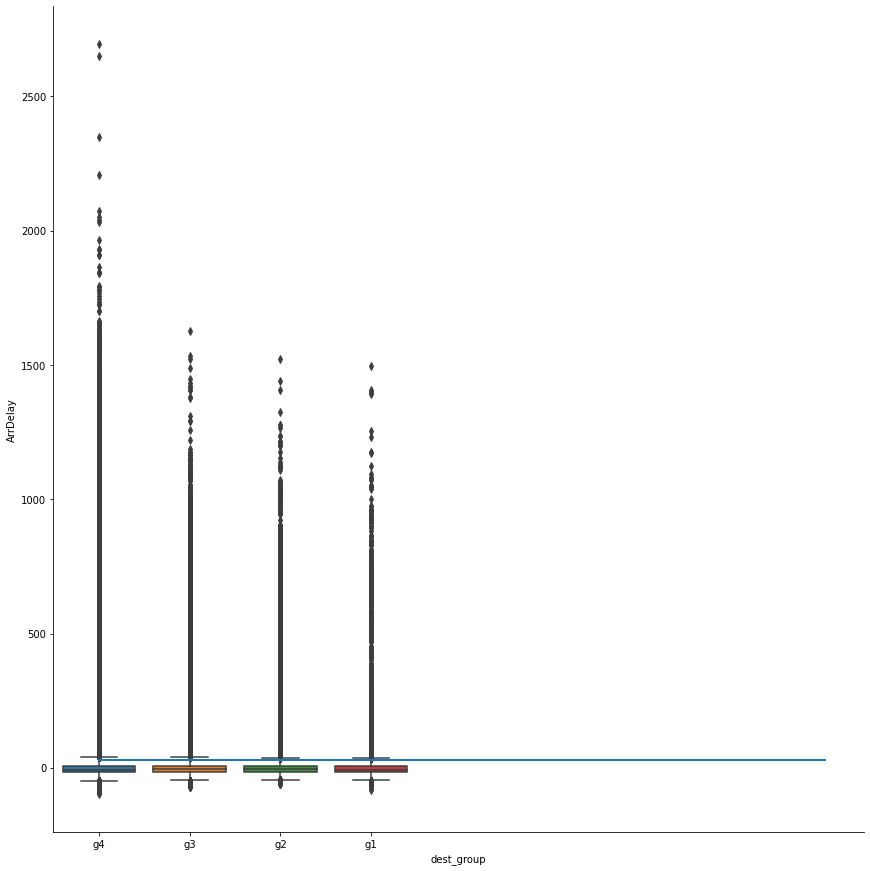

In [ ]:
boxplot_list = ['weekday','weekno','season','Reporting_Airline','org_group','dest_group']
for c in boxplot_list:
  sns.catplot(x=df[c], y=df['ArrDelay'], data=df[df['ArrDelay']<100],height=12,kind='box')
  plt.plot([0, 8], [30,30], linewidth=2)
  print('========='+c+'=========')
  plt.show()

######+ Distribution by ArrDelay mostly not delay (>30 is delay - above blue line) on different level like weekno, weekday, season, airline -> that may cause the imbalancing on event/non-event.

#### 2 + 3 + 4.APPLY MODEL + SELECT FEATURE  + TUNING MODEL

In [ ]:
y=df.ArrDelay.copy()
# x=df.drop(columns=["ArrDelay"])

In [ ]:
y_label=y.copy()
y_label[y_label <30] = 0
y_label[y_label >=30] = 1
y_label.value_counts()/df.shape[0]
# y_label.value_counts()

0.0    0.876044
1.0    0.123956
Name: ArrDelay, dtype: float64

In [ ]:
del y
y_label.value_counts()

0.0    5987682
1.0     847228
Name: ArrDelay, dtype: int64

###### + The class imbalance happen with 88% non-event (no delay) and 12% event (delay) -> undersampling non-event to balance class.

In [ ]:
# Balance class
def late_check(x):
  if int(x)>=30:
    return 1
  else:
    return 0
df['late_status'] = df['ArrDelay'].apply(lambda x: late_check(x))

In [ ]:
s = round(df.shape[0]*0.876044*0.14149515)
non_event = df[df['late_status']==0].sample(n=s,random_state=100)
event = df[df['late_status']==1]
df_new = non_event.append(event)
del non_event
del event
# del df
df_new.shape

(1694456, 23)

In [ ]:
df_new.drop(columns=["ArrDelay","DepDelay"],axis=1,inplace=True)
df_new.columns

Index(['Diverted', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime', 'DepTime',
       'CRSDepTime', 'Distance', 'Reporting_Airline', 'SecurityDelay',
       'NASDelay', 'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay',
       'TaxiIn', 'TaxiOut', 'weekday', 'weekno', 'season', 'org_group',
       'dest_group', 'late_status'],
      dtype='object')

In [ ]:
# hot one encoding
y=df_new.late_status.copy()
x=df_new.drop(columns=["late_status"])
x_enc=pd.get_dummies(x)
del x
print(x_enc.columns)
print(x_enc.shape)
x_enc.head(10)

Index(['Diverted', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime', 'DepTime',
       'CRSDepTime', 'Distance', 'SecurityDelay', 'NASDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'TaxiIn',
       'TaxiOut', 'Reporting_Airline_9E', 'Reporting_Airline_AA',
       'Reporting_Airline_AS', 'Reporting_Airline_B6', 'Reporting_Airline_DL',
       'Reporting_Airline_EV', 'Reporting_Airline_F9', 'Reporting_Airline_G4',
       'Reporting_Airline_HA', 'Reporting_Airline_MQ', 'Reporting_Airline_NK',
       'Reporting_Airline_OH', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Reporting_Airline_YV', 'Reporting_Airline_YX',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weekno_w1', 'weekno_w2',
       'weekno_w3', 'weekno_w4', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter', 'org_group_g1', 'org_group_g2',
       'org_group_g3', 'org_group_g4', 'dest_g

,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,Distance,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut,Reporting_Airline_9E,Reporting_Airline_AA,Reporting_Airline_AS,Reporting_Airline_B6,Reporting_Airline_DL,Reporting_Airline_EV,Reporting_Airline_F9,Reporting_Airline_G4,Reporting_Airline_HA,Reporting_Airline_MQ,Reporting_Airline_NK,Reporting_Airline_OH,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN,Reporting_Airline_YV,Reporting_Airline_YX,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekno_w1,weekno_w2,weekno_w3,weekno_w4,season_autumn,season_spring,season_summer,season_winter,org_group_g1,org_group_g2,org_group_g3,org_group_g4,dest_group_g1,dest_group_g2,dest_group_g3,dest_group_g4
1663250,0,228.0,2146,2127.0,1839.0,1845,1501,0,0,0,0,0,4.0,28.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1068755,0,63.0,940,956.0,853.0,830,248,0,0,16,0,0,6.0,17.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1667139,0,111.0,1549,1600.0,1309.0,1254,626,0,0,0,0,0,3.0,29.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
591601,0,73.0,2111,2118.0,2005.0,1946,335,0,0,0,0,0,4.0,17.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
1373914,0,266.0,1544,1543.0,1217.0,1222,1576,0,0,0,0,0,14.0,24.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
35394,0,154.0,1422,1356.0,1122.0,1130,1056,0,0,0,0,0,5.0,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
286551,0,59.0,2030,2021.0,1922.0,1920,223,0,0,0,0,0,6.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
1027078,0,60.0,810,758.0,558.0,600,271,0,0,0,0,0,5.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
244668,0,223.0,1248,1244.0,601.0,605,1587,0,0,0,0,0,8.0,17.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
583653,0,113.0,1210,1206.0,1013.0,1015,615,0,0,0,0,0,6.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1


##### 1.NAIVE BAYES

###### 1.1 NAIVE BAYES - ORIGINAL

In [ ]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x_enc)
print(x_scale)

[[0.         0.13404657 0.89412255 ... 0.         0.         1.        ]
 [0.         0.03020768 0.39141309 ... 0.         0.         1.        ]
 [0.         0.06041536 0.64526886 ... 0.         0.         1.        ]
 ...
 [0.         0.1157961  0.93955815 ... 0.         0.         1.        ]
 [0.         0.03272498 0.63318049 ... 0.         1.         0.        ]
 [0.         0.04594084 0.7582326  ... 0.         0.         1.        ]]


In [ ]:
nb = MultinomialNB()
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3)
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
nb_report = metrics.classification_report(y_test,y_pred)
print(nb_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred,pos_label=nb.classes_[1])
roc_auc = auc(false_positive_rate, true_positive_rate)
LG_gini_nb=2*roc_auc-1
f1_nb=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_auc))
print("F1: " + str(f1_nb))
print("Gini: " + str(LG_gini_nb))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65    254500
           1       0.65      0.72      0.68    253837

    accuracy                           0.67    508337
   macro avg       0.67      0.67      0.67    508337
weighted avg       0.67      0.67      0.67    508337

Confusion matrix
[[155930  98570]
 [ 70631 183206]]
ROC: 0.6672190923722356
F1: 0.684098406872126
Gini: 0.3344381847444713


In [ ]:
### CROS VALIDATION
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(metrics.f1_score(y_true, y_pred))
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(nb, x_scale, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40    169446
           1       0.01      0.00      0.00    169446

    accuracy                           0.25    338892
   macro avg       0.17      0.25      0.20    338892
weighted avg       0.17      0.25      0.20    338892

0.004753346724145357
              precision    recall  f1-score   support

           0       0.43      0.59      0.50    169446
           1       0.36      0.24      0.29    169445

    accuracy                           0.41    338891
   macro avg       0.40      0.41      0.39    338891
weighted avg       0.40      0.41      0.39    338891

0.2860666020923508
              precision    recall  f1-score   support

           0       0.56      0.61      0.59    169446
           1       0.57      0.52      0.55    169445

    accuracy                           0.57    338891
   macro avg       0.57      0.57      0.57    338891
weighted avg       0.57      0.57 

###### 1.2 NAIVE BAYES - PCA

[5.16981362e-01 2.34115839e-01 1.60739388e-01 5.98715272e-02
 2.26074310e-02 2.28478815e-03 1.49367909e-03 9.37922983e-04
 5.36091225e-04 3.28235972e-04]


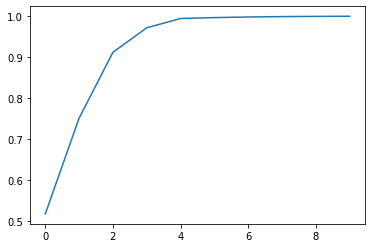

In [ ]:
col_num = len(x_enc.columns)
pca = PCA(n_components=10)
x_pca = x_enc
principalcomps = pca.fit_transform(x_pca)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

In [ ]:
nb_pca = MultinomialNB()
x_pca_new = pd.DataFrame(data=principalcomps)
x_pca_scale = scaler.fit_transform(x_pca_new)
### HOLD OUT
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca_scale, y, test_size=0.3)
nb.fit(x_train_pca,y_train_pca)
y_pred_pca = nb.predict(x_test_pca)
nb_report_pca = metrics.classification_report(y_test_pca,y_pred_pca)
print(nb_report_pca)
print('Confusion matrix')
print(confusion_matrix(y_test_pca,y_pred_pca))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_pred_pca)
roc_auc_pca = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_pca=2*roc_auc_pca-1
f1_nb_pca=metrics.f1_score(y_test_pca, y_pred_pca)
print("ROC_PCA: " + str(roc_auc_pca))
print("F1_PCA: " + str(f1_nb_pca))
print("Gini_PCA: " + str(LG_gini_nb_pca))
x_pca_new.shape

              precision    recall  f1-score   support

           0       0.65      0.60      0.62    254784
           1       0.63      0.68      0.65    253553

    accuracy                           0.64    508337
   macro avg       0.64      0.64      0.64    508337
weighted avg       0.64      0.64      0.64    508337

Confusion matrix
[[152020 102764]
 [ 80641 172912]]
ROC_PCA: 0.6393091557675558
F1_PCA: 0.6534486961220947
Gini_PCA: 0.2786183115351115


(1694456, 10)

In [ ]:
nested_score_nb_pca = cross_val_score(nb_pca, x_pca_scale, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score_nb_pca)

              precision    recall  f1-score   support

           0       0.62      0.61      0.62    169446
           1       0.62      0.63      0.62    169446

    accuracy                           0.62    338892
   macro avg       0.62      0.62      0.62    338892
weighted avg       0.62      0.62      0.62    338892

0.6227154696698682
              precision    recall  f1-score   support

           0       0.65      0.61      0.63    169446
           1       0.63      0.67      0.65    169445

    accuracy                           0.64    338891
   macro avg       0.64      0.64      0.64    338891
weighted avg       0.64      0.64      0.64    338891

0.6522346768696767
              precision    recall  f1-score   support

           0       0.69      0.61      0.65    169446
           1       0.65      0.72      0.68    169445

    accuracy                           0.67    338891
   macro avg       0.67      0.67      0.66    338891
weighted avg       0.67      0.67   

###### 1.3 NAIVE BAYES - SelectKBest

In [ ]:
nb_kbest = MultinomialNB()
nb_kbest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k=30)),('nb_clf', nb_kbest)])
nb_kbest_clf.fit(x_train,y_train)
y_pred_knest = nb_kbest_clf.predict(x_test)
nb_report_kbest = metrics.classification_report(y_test,y_pred_knest)
print(nb_report_kbest)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_knest))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knest)
roc_auc_kbest = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_kbest=2*roc_auc_kbest-1
f1_nb_kbest=metrics.f1_score(y_test, y_pred_knest)
print("ROC_SelectKBest: " + str(roc_auc_kbest))
print("F1_SelectKBest: " + str(f1_nb_kbest))
print("Gini_SelectKBest: " + str(LG_gini_nb_kbest))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63    254500
           1       0.64      0.72      0.67    253837

    accuracy                           0.65    508337
   macro avg       0.66      0.65      0.65    508337
weighted avg       0.66      0.65      0.65    508337

Confusion matrix
[[151047 103453]
 [ 72095 181742]]
ROC_SelectKBest: 0.6547420317834178
F1_SelectKBest: 0.6743273126641832
Gini_SelectKBest: 0.30948406356683567


###### 1.4 NAIVE BAYES - RFE

In [ ]:
nb_rfe = MultinomialNB()
nb_rfe_clf = Pipeline([('rfe', RFE(nb_rfe,n_features_to_select=30)),('nb_clf', nb_rfe)])
nb_rfe_clf.fit(x_train,y_train)
y_pred_rfe = nb_rfe_clf.predict(x_test)
nb_report_rfe = metrics.classification_report(y_test,y_pred_rfe)
print(nb_report_rfe)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfe))  
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfe)
roc_auc_rfe = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_rfe=2*roc_auc_rfe-1
f1_nb_rfe=metrics.f1_score(y_test, y_pred_rfe)
print("ROC_RFE: " + str(roc_auc_rfe))
print("F1_RFE: " + str(f1_nb_rfe))
print("Gini_RFE: " + str(LG_gini_nb_rfe))

              precision    recall  f1-score   support

           0       0.69      0.44      0.54    254500
           1       0.59      0.80      0.68    253837

    accuracy                           0.62    508337
   macro avg       0.64      0.62      0.61    508337
weighted avg       0.64      0.62      0.61    508337

Confusion matrix
[[112802 141698]
 [ 50714 203123]]
ROC_RFE: 0.6217201168489597
F1_RFE: 0.6785944562671843
Gini_RFE: 0.24344023369791934


###### 1.5 NAIVE BAYES - GridSearchCV Tuning model

In [ ]:
nb_ = MultinomialNB()
parameters = { 'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}
nb_tuning = GridSearchCV(nb_, parameters, n_jobs=-1)   
nb_tuning.fit(x_train, y_train)
y_pred_grid = nb_tuning.predict(x_test)
nb_report_grid = metrics.classification_report(y_test,y_pred_grid)
print(nb_report_grid)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_grid))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid,pos_label=nb_tuning.classes_[1])
roc_auc_grid = auc(false_positive_rate, true_positive_rate)
LG_gini_nb_grid=2*roc_auc_grid-1
f1_nb_grid=metrics.f1_score(y_test, y_pred_grid)
print("ROC: " + str(roc_auc_grid))
print("F1: " + str(f1_nb_grid))
print("Gini: " + str(LG_gini_nb_grid))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65    254500
           1       0.65      0.72      0.68    253837

    accuracy                           0.67    508337
   macro avg       0.67      0.67      0.67    508337
weighted avg       0.67      0.67      0.67    508337

Confusion matrix
[[155927  98573]
 [ 70536 183301]]
ROC: 0.6674003264226778
F1: 0.6843279305446407
Gini: 0.33480065284535554


In [ ]:
print("========CONCLUSION FOR NAIVE BAYES========")
print('========Naive Bayes - Orginal========')
print("*****ROC: " + str(roc_auc))
print("*****F1: " + str(f1_nb))
print("*****Gini: " + str(LG_gini_nb))

print('========Naive Bayes - PCA========')
print("*****ROC: " + str(roc_auc_pca))
print("*****F1: " + str(f1_nb_pca))
print("*****Gini: " + str(LG_gini_nb_pca))

print('========Naive Bayes - SelectKBest========')
print("*****ROC: " + str(roc_auc_kbest))
print("*****F1: " + str(f1_nb_kbest))
print("*****Gini: " + str(LG_gini_nb_kbest))

print('========Naive Bayes - RFE========')
print("*****ROC: " + str(roc_auc_rfe))
print("*****F1: " + str(f1_nb_rfe))
print("*****Gini: " + str(LG_gini_nb_rfe))

print('========Naive Bayes - GridSearchCV========')
print("*****ROC: " + str(roc_auc_grid))
print("*****F1: " + str(f1_nb_grid))
print("*****Gini: " + str(LG_gini_nb_grid))

========CONCLUSION FOR NAIVE BAYES========
========Naive Bayes - Orginal========
*****ROC: 0.6672190923722356
*****F1: 0.684098406872126
*****Gini: 0.3344381847444713
========Naive Bayes - PCA========
*****ROC: 0.6393091557675558
*****F1: 0.6534486961220947
*****Gini: 0.2786183115351115
========Naive Bayes - SelectKBest========
*****ROC: 0.6547420317834178
*****F1: 0.6743273126641832
*****Gini: 0.30948406356683567
========Naive Bayes - RFE========
*****ROC: 0.6217201168489597
*****F1: 0.6785944562671843
*****Gini: 0.24344023369791934
========Naive Bayes - GridSearchCV========
*****ROC: 0.6674003264226778
*****F1: 0.6843279305446407
*****Gini: 0.33480065284535554


######+ In conclusion, Naive Bayes with tuning by GridSearchCV has the best perfromance among all with ROC & GINI higher and F1 is not different from others method

##### 2. LOGISTIC REGRESSION

###### 2.1 LG - ORGINAL

In [ ]:
scaler = MinMaxScaler()
x_new = x_enc.drop(columns=['CarrierDelay','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay'])
x_scale_lg = scaler.fit_transform(x_new)
x_scale_lg.shape

(1694456, 49)

In [ ]:
lg = LogisticRegression()
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_scale_lg, y, test_size=0.3)
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
lg_report = metrics.classification_report(y_test,y_pred)
print(lg_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_lg = auc(false_positive_rate, true_positive_rate)
lg_gini=2*roc_auc_lg-1
f1_lg=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_auc_lg))
print("F1: " + str(f1_lg))
print("Gini: " + str(lg_gini))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.68      0.74      0.71    253930
           1       0.72      0.66      0.69    254407

    accuracy                           0.70    508337
   macro avg       0.70      0.70      0.70    508337
weighted avg       0.70      0.70      0.70    508337

Confusion matrix
[[187725  66205]
 [ 86989 167418]]
ROC: 0.6986750283290446
F1: 0.6860971661578181
Gini: 0.3973500566580892


In [ ]:
nested_score_lg = cross_val_score(lg, x_scale_lg, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score_lg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.44      0.70      0.54    169446
           1       0.30      0.13      0.18    169446

    accuracy                           0.41    338892
   macro avg       0.37      0.41      0.36    338892
weighted avg       0.37      0.41      0.36    338892

0.18091994306916442


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.56      0.73      0.64    169446
           1       0.62      0.43      0.51    169445

    accuracy                           0.58    338891
   macro avg       0.59      0.58      0.57    338891
weighted avg       0.59      0.58      0.57    338891

0.5085541508609629


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.67      0.75      0.71    169446
           1       0.72      0.63      0.67    169445

    accuracy                           0.69    338891
   macro avg       0.69      0.69      0.69    338891
weighted avg       0.69      0.69      0.69    338891

0.6687427382103172


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.51      0.72      0.60    169445
           1       0.53      0.31      0.39    169446

    accuracy                           0.52    338891
   macro avg       0.52      0.52      0.50    338891
weighted avg       0.52      0.52      0.50    338891

0.39439481754233735


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.42      0.70      0.53    169445
           1       0.15      0.05      0.08    169446

    accuracy                           0.38    338891
   macro avg       0.29      0.38      0.30    338891
weighted avg       0.29      0.38      0.30    338891

0.07675307635640836
[0.41243818 0.58177703 0.68956685 0.51807808 0.37501143]


###### 2.2 LG - PCA

[5.19668989e-01 2.35344660e-01 1.61548415e-01 6.01849128e-02
 2.27121790e-02 4.41667504e-04 7.20469035e-05 2.47520804e-05
 1.86451693e-07 1.75376574e-07]


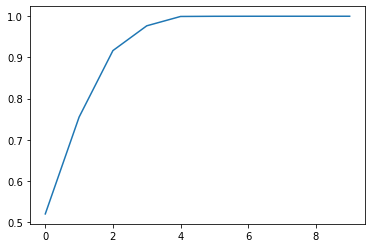

In [ ]:
col_num = len(x_new.columns)
lg_pca = PCA(n_components=10)
x_pca_lg = x_new
principalcomps_lg = lg_pca.fit_transform(x_pca_lg)
print(lg_pca.explained_variance_ratio_)
plt.plot(lg_pca.explained_variance_ratio_.cumsum())
plt.show()

In [ ]:
lg_pca = LogisticRegression()
x_lg_pca_new = pd.DataFrame(data=principalcomps_lg)
x_lg_pca_scale = scaler.fit_transform(x_lg_pca_new)
### HOLD OUT
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_lg_pca_scale, y, test_size=0.3)
lg_pca.fit(x_train_pca,y_train_pca)
y_pred_pca = lg_pca.predict(x_test_pca)
lg_report_pca = metrics.classification_report(y_test_pca,y_pred_pca)
print(lg_report_pca)
print('Confusion matrix')
print(confusion_matrix(y_test_pca,y_pred_pca))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_pred_pca)
roc_auc_lg_pca = auc(false_positive_rate, true_positive_rate)
lg_gini_pca=2*roc_auc_lg_pca-1
f1_lg_pca=metrics.f1_score(y_test_pca, y_pred_pca)
print("ROC_PCA: " + str(roc_auc_lg_pca))
print("F1_PCA: " + str(f1_lg_pca))
print("Gini_PCA: " + str(lg_gini_pca))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.68      0.73      0.70    253550
           1       0.71      0.65      0.68    254787

    accuracy                           0.69    508337
   macro avg       0.69      0.69      0.69    508337
weighted avg       0.69      0.69      0.69    508337

Confusion matrix
[[186153  67397]
 [ 89253 165534]]
ROC_PCA: 0.6919410895445165
F1_PCA: 0.6788102961137378
Gini_PCA: 0.383882179089033


###### 2.3 LG - SelectKBest

In [ ]:
lg_kbest = LogisticRegression()
lg_kbest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k=20)),('lg_clf', lg_kbest)])
lg_kbest_clf.fit(x_train,y_train)
y_pred_kbest = lg_kbest_clf.predict(x_test)
lg_report_kbest = metrics.classification_report(y_test,y_pred_kbest)
print(lg_report_kbest)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_kbest))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_kbest)
roc_lg_auc_kbest = auc(false_positive_rate, true_positive_rate)
lg_gini_kbest=2*roc_lg_auc_kbest-1
f1_lg_kbest=metrics.f1_score(y_test, y_pred_kbest)
print("ROC_SelectKBest: " + str(roc_lg_auc_kbest))
print("F1_SelectKBest: " + str(f1_lg_kbest))
print("Gini_SelectKBest: " + str(lg_gini_kbest))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70    253930
           1       0.71      0.65      0.68    254407

    accuracy                           0.69    508337
   macro avg       0.69      0.69      0.69    508337
weighted avg       0.69      0.69      0.69    508337

Confusion matrix
[[185967  67963]
 [ 89794 164613]]
ROC_SelectKBest: 0.6897006244190861
F1_SelectKBest: 0.6760523467965001
Gini_SelectKBest: 0.37940124883817217


###### 2.4 LG - RFE

In [ ]:
lg_rfe = LogisticRegression()
lg_rfe_clf = Pipeline([('rfe', RFE(lg_rfe,n_features_to_select=20)),('lg_clf', lg_rfe)])
lg_rfe_clf.fit(x_train,y_train)
y_pred_rfe = lg_rfe_clf.predict(x_test)
lg_report_rfe = metrics.classification_report(y_test,y_pred_rfe)
print(lg_report_rfe)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfe))  
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfe)
roc_lg_auc_rfe = auc(false_positive_rate, true_positive_rate)
lg_gini_rfe=2*roc_lg_auc_rfe-1
f1_lg_rfe=metrics.f1_score(y_test, y_pred_rfe)
print("ROC_RFE: " + str(roc_lg_auc_rfe))
print("F1_RFE: " + str(f1_lg_rfe))
print("Gini_RFE: " + str(lg_gini_rfe))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.68      0.73      0.70    253930
           1       0.71      0.65      0.68    254407

    accuracy                           0.69    508337
   macro avg       0.69      0.69      0.69    508337
weighted avg       0.69      0.69      0.69    508337

Confusion matrix
[[185927  68003]
 [ 88876 165531]]
ROC_RFE: 0.6914260581948515
F1_RFE: 0.6784877679883429
Gini_RFE: 0.38285211638970296


###### 2.5 LG - GridSearchCV Tuning model

In [ ]:
lg_ = LogisticRegression()
parameters = {'tol':[0.01, 0.001],'C':[0.1,5,10]}
lg_tuning = GridSearchCV(lg_, parameters)   
lg_tuning.fit(x_train, y_train)
y_pred_grid = lg_tuning.predict(x_test)
lg_report_grid = metrics.classification_report(y_test,y_pred_grid)
print(lg_report_grid)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_grid))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid)
roc_lg_auc_grid = auc(false_positive_rate, true_positive_rate)
lg_gini_grid=2*roc_lg_auc_grid-1
f1_lg_grid=metrics.f1_score(y_test, y_pred_grid)
print("ROC: " + str(roc_lg_auc_grid))
print("F1: " + str(f1_lg_grid))
print("Gini: " + str(lg_gini_grid))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       0.68      0.74      0.71    253930
           1       0.71      0.66      0.68    254407

    accuracy                           0.70    508337
   macro avg       0.70      0.70      0.70    508337
weighted avg       0.70      0.70      0.70    508337

Confusion matrix
[[187086  66844]
 [ 87267 167140]]
ROC: 0.6968704389454702
F1: 0.6844515971834042
Gini: 0.39374087789094037


In [ ]:
print("========CONCLUSION FOR LOGISTIC REGRESSION========")
print('========LG - Orginal========')
print("*****ROC: " + str(roc_auc_lg))
print("*****F1: " + str(f1_lg))
print("*****Gini: " + str(lg_gini))

print('========LG - PCA========')
print("*****ROC_PCA: " + str(roc_auc_lg_pca))
print("*****F1_PCA: " + str(f1_lg_pca))
print("*****Gini_PCA: " + str(lg_gini_pca))

print('========LG - SelectKBest========')
print("*****ROC_SelectKBest: " + str(roc_lg_auc_kbest))
print("*****F1_SelectKBest: " + str(f1_lg_kbest))
print("*****Gini_SelectKBest: " + str(lg_gini_kbest))

print('========LG - RFE========')
print("*****ROC_RFE: " + str(roc_lg_auc_rfe))
print("*****F1_RFE: " + str(f1_lg_rfe))
print("*****Gini_RFE: " + str(lg_gini_rfe))

print('========LG - GridSearchCV========')
print("*****ROC: " + str(roc_lg_auc_grid))
print("*****F1: " + str(f1_lg_grid))
print("*****Gini: " + str(lg_gini_grid))

========CONCLUSION FOR LOGISTIC REGRESSION========
========LG - Orginal========
*****ROC: 0.6986750283290446
*****F1: 0.6860971661578181
*****Gini: 0.3973500566580892
========LG - PCA========
*****ROC_PCA: 0.6919410895445165
*****F1_PCA: 0.6788102961137378
*****Gini_PCA: 0.383882179089033
========LG - SelectKBest========
*****ROC_SelectKBest: 0.6897006244190861
*****F1_SelectKBest: 0.6760523467965001
*****Gini_SelectKBest: 0.37940124883817217
========LG - RFE========
*****ROC_RFE: 0.6914260581948515
*****F1_RFE: 0.6784877679883429
*****Gini_RFE: 0.38285211638970296
========LG - GridSearchCV========
*****ROC: 0.6968704389454702
*****F1: 0.6844515971834042
*****Gini: 0.39374087789094037


##### 3. DECISION TREE

###### 3.1 DT - ORGINAL

In [ ]:
x_new1 = x_enc.drop(columns=['CarrierDelay','SecurityDelay','Diverted',
                            'NASDelay','LateAircraftDelay','WeatherDelay'])

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.3)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dt_report = metrics.classification_report(y_test,y_pred)
print(dt_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_dt_auc = auc(false_positive_rate, true_positive_rate)
dt_gini=2*roc_dt_auc-1
dt_f1=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_dt_auc))
print("F1: " + str(dt_f1))
print("Gini: " + str(dt_gini))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85    254425
           1       0.92      0.73      0.81    253912

    accuracy                           0.83    508337
   macro avg       0.85      0.83      0.83    508337
weighted avg       0.85      0.83      0.83    508337

Confusion matrix
[[238694  15731]
 [ 68928 184984]]
ROC: 0.8333531274475124
F1: 0.8137836072208646
Gini: 0.6667062548950249


In [ ]:
nested_score_dt = cross_val_score(dt, x_new1, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score_dt)

              precision    recall  f1-score   support

           0       0.50      0.84      0.63    169446
           1       0.51      0.17      0.26    169446

    accuracy                           0.50    338892
   macro avg       0.51      0.50      0.44    338892
weighted avg       0.51      0.50      0.44    338892

0.2555595464563018
              precision    recall  f1-score   support

           0       0.76      0.95      0.84    169446
           1       0.94      0.70      0.80    169445

    accuracy                           0.82    338891
   macro avg       0.85      0.82      0.82    338891
weighted avg       0.85      0.82      0.82    338891

0.7988288315701569
              precision    recall  f1-score   support

           0       0.78      0.94      0.86    169446
           1       0.93      0.74      0.82    169445

    accuracy                           0.84    338891
   macro avg       0.85      0.84      0.84    338891
weighted avg       0.85      0.84   

###### 3.2 DT - PCA

[5.19668989e-01 2.35344660e-01 1.61548415e-01 6.01849128e-02
 2.27121790e-02 4.41667504e-04 7.20469035e-05 2.47520804e-05
 1.86525227e-07 1.75265517e-07]


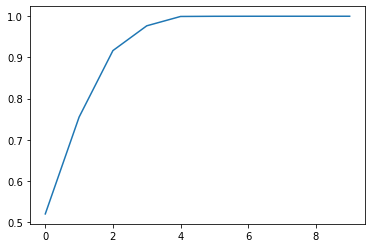

In [ ]:
col_num = len(x_new1.columns)
dt_pca = PCA(n_components=10)
x_pca_dt = x_new1
principalcomps_dt = dt_pca.fit_transform(x_pca_dt)
print(dt_pca.explained_variance_ratio_)
plt.plot(dt_pca.explained_variance_ratio_.cumsum())
plt.show()

In [ ]:
dt_pca = DecisionTreeClassifier(max_depth=5)
x_dt_pca_new = pd.DataFrame(data=principalcomps_dt)
### HOLD OUT
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_dt_pca_new, y, test_size=0.3)
dt_pca.fit(x_train_pca,y_train_pca)
y_pred_pca = dt_pca.predict(x_test_pca)
dt_report_pca = metrics.classification_report(y_test_pca,y_pred_pca)
print(dt_report_pca)
print('Confusion matrix')
print(confusion_matrix(y_test_pca,y_pred_pca))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_pred_pca)
roc_auc_dt_pca = auc(false_positive_rate, true_positive_rate)
dt_gini_pca=2*roc_auc_dt_pca-1
f1_dt_pca=metrics.f1_score(y_test_pca, y_pred_pca)
print("ROC_PCA: " + str(roc_auc_dt_pca))
print("F1_PCA: " + str(f1_dt_pca))
print("Gini_PCA: " + str(dt_gini_pca))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89    254006
           1       0.94      0.82      0.88    254331

    accuracy                           0.89    508337
   macro avg       0.89      0.89      0.89    508337
weighted avg       0.89      0.89      0.89    508337

Confusion matrix
[[241608  12398]
 [ 45333 208998]]
ROC_PCA: 0.8864730150709985
F1_PCA: 0.8786467869177069
Gini_PCA: 0.772946030141997


###### 3.3 DT - SelectKBest

In [ ]:
dt_kbest = DecisionTreeClassifier(max_depth=10)
dt_kbest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k=20)),('dt_clf', dt_kbest)])
dt_kbest_clf.fit(x_train,y_train)
y_pred_kbest = dt_kbest_clf.predict(x_test)
dt_report_kbest = metrics.classification_report(y_test,y_pred_kbest)
print(dt_report_kbest)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_kbest))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_kbest)
roc_dt_auc_kbest = auc(false_positive_rate, true_positive_rate)
dt_gini_kbest=2*roc_dt_auc_kbest-1
f1_dt_kbest=metrics.f1_score(y_test, y_pred_kbest)
print("ROC_SelectKBest: " + str(roc_dt_auc_kbest))
print("F1_SelectKBest: " + str(f1_dt_kbest))
print("Gini_SelectKBest: " + str(dt_gini_kbest))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85    254425
           1       0.92      0.73      0.81    253912

    accuracy                           0.83    508337
   macro avg       0.85      0.83      0.83    508337
weighted avg       0.85      0.83      0.83    508337

Confusion matrix
[[238711  15714]
 [ 68897 185015]]
ROC_SelectKBest: 0.8334475808855305
F1_SelectKBest: 0.8138949192879656
Gini_SelectKBest: 0.666895161771061


###### 3.4 DT - RFE

In [ ]:
dt_rfe = DecisionTreeClassifier(max_depth=10)
dt_rfe_clf = Pipeline([('rfe', RFE(dt_rfe,n_features_to_select=20)),('dt_clf', dt_rfe)])
dt_rfe_clf.fit(x_train,y_train)
y_pred_rfe = dt_rfe_clf.predict(x_test)
dt_report_rfe = metrics.classification_report(y_test,y_pred_rfe)
print(dt_report_rfe)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfe))  
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfe)
roc_dt_auc_rfe = auc(false_positive_rate, true_positive_rate)
dt_gini_rfe=2*roc_dt_auc_rfe-1
f1_dt_rfe=metrics.f1_score(y_test, y_pred_rfe)
print("ROC_RFE: " + str(roc_dt_auc_rfe))
print("F1_RFE: " + str(f1_dt_rfe))
print("Gini_RFE: " + str(dt_gini_rfe))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85    254425
           1       0.92      0.73      0.81    253912

    accuracy                           0.83    508337
   macro avg       0.85      0.83      0.83    508337
weighted avg       0.85      0.83      0.83    508337

Confusion matrix
[[238695  15730]
 [ 68923 184989]]
ROC_RFE: 0.8333649385940685
F1_RFE: 0.8137984431330024
Gini_RFE: 0.6667298771881369


###### 3.5 DT - GridSearchCV Tuning model

In [ ]:
dt_ = DecisionTreeClassifier()
parameters = {"max_depth":[1,5,10],'min_samples_split':[0.1,1.0,10],"min_samples_leaf":[0.1,0.5,5]}
dt_tuning = GridSearchCV(dt_, parameters)   
dt_tuning.fit(x_train, y_train)
y_pred_grid = dt_tuning.predict(x_test)
dt_report_grid = metrics.classification_report(y_test,y_pred_grid)
print(dt_report_grid)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_grid))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid)
roc_dt_auc_grid = auc(false_positive_rate, true_positive_rate)
dt_gini_grid=2*roc_dt_auc_grid-1
f1_dt_grid=metrics.f1_score(y_test, y_pred_grid)
print("ROC: " + str(roc_dt_auc_grid))
print("F1: " + str(f1_dt_grid))
print("Gini: " + str(dt_gini_grid))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85    254425
           1       0.92      0.73      0.81    253912

    accuracy                           0.83    508337
   macro avg       0.85      0.83      0.83    508337
weighted avg       0.85      0.83      0.83    508337

Confusion matrix
[[238709  15716]
 [ 68911 185001]]
ROC: 0.8334160818477193
F1: 0.8138548134852814
Gini: 0.6668321636954386


In [ ]:
print("========CONCLUSION FOR DECISION TREE========")
print('========DT - Orginal========')
print("*****ROC: " + str(roc_dt_auc))
print("*****F1: " + str(dt_f1))
print("*****Gini: " + str(dt_gini))

print('========DT - PCA========')
print("*****ROC_PCA: " + str(roc_auc_dt_pca))
print("*****F1_PCA: " + str(f1_dt_pca))
print("*****Gini_PCA: " + str(dt_gini_pca))

print('========DT - SelectKBest========')
print("*****ROC_SelectKBest: " + str(roc_dt_auc_kbest))
print("*****F1_SelectKBest: " + str(f1_dt_kbest))
print("*****Gini_SelectKBest: " + str(dt_gini_kbest))

print('========DT - RFE========')
print("*****ROC_RFE: " + str(roc_dt_auc_rfe))
print("*****F1_RFE: " + str(f1_dt_rfe))
print("*****Gini_RFE: " + str(dt_gini_rfe))

print('========DT - GridSearchCV========')
print("*****ROC: " + str(roc_dt_auc_grid))
print("*****F1: " + str(f1_dt_grid))
print("*****Gini: " + str(dt_gini_grid))

========CONCLUSION FOR DECISION TREE========
========DT - Orginal========
*****ROC: 0.8333531274475124
*****F1: 0.8137836072208646
*****Gini: 0.6667062548950249
========DT - PCA========
*****ROC_PCA: 0.8864730150709985
*****F1_PCA: 0.8786467869177069
*****Gini_PCA: 0.772946030141997
========DT - SelectKBest========
*****ROC_SelectKBest: 0.8334475808855305
*****F1_SelectKBest: 0.8138949192879656
*****Gini_SelectKBest: 0.666895161771061
========DT - RFE========
*****ROC_RFE: 0.8333649385940685
*****F1_RFE: 0.8137984431330024
*****Gini_RFE: 0.6667298771881369
========DT - GridSearchCV========
*****ROC: 0.8334160818477193
*****F1: 0.8138548134852814
*****Gini: 0.6668321636954386


######+ In conclusion, Decision Tree by PCA has the best perfromance among all.

##### 4. RANDOM FOREST

###### 4.1 RF - ORGINAL

In [ ]:
rf = RandomForestClassifier(n_estimators=20,max_depth=10)
### HOLD OUT
x_train, x_test, y_train, y_test = train_test_split(x_new1, y, test_size=0.3)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf_report = metrics.classification_report(y_test,y_pred)
print(rf_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_rf_auc = auc(false_positive_rate, true_positive_rate)
rf_gini=2*roc_rf_auc-1
rf_f1=metrics.f1_score(y_test, y_pred)
print("ROC: " + str(roc_rf_auc))
print("F1: " + str(rf_f1))
print("Gini: " + str(rf_gini))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80    254303
           1       0.80      0.78      0.79    254034

    accuracy                           0.79    508337
   macro avg       0.79      0.79      0.79    508337
weighted avg       0.79      0.79      0.79    508337

Confusion matrix
[[205543  48760]
 [ 56763 197271]]
ROC: 0.7924068786057634
F1: 0.7889814324137863
Gini: 0.5848137572115268


In [ ]:
nested_score_rf = cross_val_score(rf, x_new1, y, cv=5,scoring=make_scorer(classification_report_with_accuracy_score))
print(nested_score_rf)

              precision    recall  f1-score   support

           0       0.46      0.75      0.57    169446
           1       0.34      0.13      0.18    169446

    accuracy                           0.44    338892
   macro avg       0.40      0.44      0.38    338892
weighted avg       0.40      0.44      0.38    338892

0.18466435582400986
              precision    recall  f1-score   support

           0       0.66      0.81      0.73    169446
           1       0.75      0.59      0.66    169445

    accuracy                           0.70    338891
   macro avg       0.71      0.70      0.70    338891
weighted avg       0.71      0.70      0.70    338891

0.6640996198923027
              precision    recall  f1-score   support

           0       0.80      0.81      0.81    169446
           1       0.81      0.79      0.80    169445

    accuracy                           0.80    338891
   macro avg       0.80      0.80      0.80    338891
weighted avg       0.80      0.80  

###### 4.2 RF - PCA

In [ ]:
rf_pca = RandomForestClassifier(n_estimators=20,max_depth=5)
x_dt_pca_new = pd.DataFrame(data=principalcomps_dt)
### HOLD OUT
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_dt_pca_new, y, test_size=0.3)
rf_pca.fit(x_train_pca,y_train_pca)
y_pred_pca = rf_pca.predict(x_test_pca)
rf_report_pca = metrics.classification_report(y_test_pca,y_pred_pca)
print(rf_report_pca)
print('Confusion matrix')
print(confusion_matrix(y_test_pca,y_pred_pca))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_pca, y_pred_pca)
roc_auc_rf_pca = auc(false_positive_rate, true_positive_rate)
rf_gini_pca=2*roc_auc_rf_pca-1
f1_rf_pca=metrics.f1_score(y_test_pca, y_pred_pca)
print("ROC_PCA: " + str(roc_auc_rf_pca))
print("F1_PCA: " + str(f1_rf_pca))
print("Gini_PCA: " + str(rf_gini_pca))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90    254301
           1       0.94      0.85      0.89    254036

    accuracy                           0.90    508337
   macro avg       0.90      0.90      0.90    508337
weighted avg       0.90      0.90      0.90    508337

Confusion matrix
[[239959  14342]
 [ 37160 216876]]
ROC_PCA: 0.8986618931949598
F1_PCA: 0.8938658929138141
Gini_PCA: 0.7973237863899196


###### 4.3 RF - SelectKBest

In [ ]:
rf_kbest = RandomForestClassifier(n_estimators=20,max_depth=5)
rf_kbest_clf = Pipeline([('k_best', SelectKBest(score_func=chi2, k=20)),('rf_clf', rf_kbest)])
rf_kbest_clf.fit(x_train,y_train)
y_pred_kbest = rf_kbest_clf.predict(x_test)
rf_report_kbest = metrics.classification_report(y_test,y_pred_kbest)
print(rf_report_kbest)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_kbest))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_kbest)
roc_rf_auc_kbest = auc(false_positive_rate, true_positive_rate)
rf_gini_kbest=2*roc_rf_auc_kbest-1
f1_rf_kbest=metrics.f1_score(y_test, y_pred_kbest)
print("ROC_SelectKBest: " + str(roc_rf_auc_kbest))
print("F1_SelectKBest: " + str(f1_rf_kbest))
print("Gini_SelectKBest: " + str(rf_gini_kbest))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74    254303
           1       0.73      0.77      0.75    254034

    accuracy                           0.74    508337
   macro avg       0.74      0.74      0.74    508337
weighted avg       0.74      0.74      0.74    508337

Confusion matrix
[[182590  71713]
 [ 59565 194469]]
ROC_SelectKBest: 0.7417626332070201
F1_SelectKBest: 0.7476471311916588
Gini_SelectKBest: 0.48352526641404014


###### 4.4 RF - RFE

In [ ]:
rf_rfe = RandomForestClassifier(n_estimators=20,max_depth=5)
rf_rfe_clf = Pipeline([('rfe', RFE(rf_rfe,n_features_to_select=20)),('rf_clf', rf_rfe)])
rf_rfe_clf.fit(x_train,y_train)
y_pred_rfe = rf_rfe_clf.predict(x_test)
rf_report_rfe = metrics.classification_report(y_test,y_pred_rfe)
print(rf_report_rfe)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfe))  
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfe)
roc_rf_auc_rfe = auc(false_positive_rate, true_positive_rate)
rf_gini_rfe=2*roc_rf_auc_rfe-1
f1_rf_rfe=metrics.f1_score(y_test, y_pred_rfe)
print("ROC_RFE: " + str(roc_rf_auc_rfe))
print("F1_RFE: " + str(f1_rf_rfe))
print("Gini_RFE: " + str(rf_gini_rfe))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71    254303
           1       0.70      0.77      0.74    254034

    accuracy                           0.72    508337
   macro avg       0.73      0.72      0.72    508337
weighted avg       0.73      0.72      0.72    508337

Confusion matrix
[[171964  82339]
 [ 57917 196117]]
ROC_RFE: 0.7241138934934499
F1_RFE: 0.7366035042911604
Gini_RFE: 0.4482277869868998


###### 4.5 RF - GridSearchCV Tuning model

In [ ]:
rf_ = RandomForestClassifier()
parameters = {"n_estimators":[1,10,20],"max_depth":[5,8,10],'min_samples_split':[1.0,10],"min_samples_leaf":[0.1,0.5,5]}
rf_tuning = GridSearchCV(rf_, parameters)   
rf_tuning.fit(x_train, y_train)
y_pred_grid = rf_tuning.predict(x_test)
rf_report_grid = metrics.classification_report(y_test,y_pred_grid)
print(rf_report_grid)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_grid))
# gini index
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_grid)
roc_rf_auc_grid = auc(false_positive_rate, true_positive_rate)
rf_gini_grid=2*roc_rf_auc_grid-1
f1_rf_grid=metrics.f1_score(y_test, y_pred_grid)
print("ROC: " + str(roc_rf_auc_grid))
print("F1: " + str(f1_rf_grid))
print("Gini: " + str(rf_gini_grid))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80    254303
           1       0.81      0.78      0.80    254034

    accuracy                           0.80    508337
   macro avg       0.80      0.80      0.80    508337
weighted avg       0.80      0.80      0.80    508337

Confusion matrix
[[208498  45805]
 [ 55519 198515]]
ROC: 0.8006653680617216
F1: 0.7966826793805207
Gini: 0.6013307361234432


In [66]:
print("========CONCLUSION FOR RANDOM FOREST========")
print('========RF - Orginal========')
print("*****ROC: " + str(roc_rf_auc))
print("*****F1: " + str(rf_f1))
print("*****Gini: " + str(rf_gini))

print('========RF - PCA========')
print("*****ROC_PCA: " + str(roc_auc_rf_pca))
print("*****F1_PCA: " + str(f1_rf_pca))
print("*****Gini_PCA: " + str(rf_gini_pca))

print('========RF - SelectKBest========')
print("*****ROC_SelectKBest: " + str(roc_rf_auc_kbest))
print("*****F1_SelectKBest: " + str(f1_rf_kbest))
print("*****Gini_SelectKBest: " + str(rf_gini_kbest))

print('========RF - RFE========')
print("*****ROC_RFE: " + str(roc_rf_auc_rfe))
print("*****F1_RFE: " + str(f1_rf_rfe))
print("*****Gini_RFE: " + str(rf_gini_rfe))

print('========RF - GridSearchCV========')
print("*****ROC: " + str(roc_rf_auc_grid))
print("*****F1: " + str(f1_rf_grid))
print("*****Gini: " + str(rf_gini_grid))

========CONCLUSION FOR RANDOM FOREST========
========RF - Orginal========
*****ROC: 0.7924068786057634
*****F1: 0.7889814324137863
*****Gini: 0.5848137572115268
========RF - PCA========
*****ROC_PCA: 0.8986618931949598
*****F1_PCA: 0.8938658929138141
*****Gini_PCA: 0.7973237863899196
========RF - SelectKBest========
*****ROC_SelectKBest: 0.7417626332070201
*****F1_SelectKBest: 0.7476471311916588
*****Gini_SelectKBest: 0.48352526641404014
========RF - RFE========
*****ROC_RFE: 0.7241138934934499
*****F1_RFE: 0.7366035042911604
*****Gini_RFE: 0.4482277869868998
========RF - GridSearchCV========
*****ROC: 0.8006653680617216
*****F1: 0.7966826793805207
*****Gini: 0.6013307361234432


##### 5. GRADIENT BOOSTING

In [67]:
gb_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1,max_depth=5, random_state=0)
# x_train, x_test, y_train, y_test = train_test_split(x_scale_lg, y, test_size=0.3)
gb_model.fit(x_train,y_train)
y_pred_gb = gb_model.predict(x_test)
xgb_report = metrics.classification_report(y_test,y_pred_gb)
print(xgb_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_gb))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gb)
roc_gb_auc = auc(false_positive_rate, true_positive_rate)
gb_gini=2*roc_gb_auc-1
gb_f1=metrics.f1_score(y_test, y_pred_gb)
print("ROC: " + str(roc_gb_auc))
print("F1: " + str(gb_f1))
print("Gini: " + str(gb_gini))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88    254303
           1       0.90      0.85      0.88    254034

    accuracy                           0.88    508337
   macro avg       0.88      0.88      0.88    508337
weighted avg       0.88      0.88      0.88    508337

Confusion matrix
[[231209  23094]
 [ 37321 216713]]
ROC: 0.8811368334112779
F1: 0.8776630534929258
Gini: 0.7622736668225558


##### 6. SVM

In [77]:
num = round(df_new.shape[0]*0.25)
non_event_svm = df_new[df_new['late_status']==0].sample(n=num,random_state=100)
event_svm = df_new[df_new['late_status']==1].sample(n=num,random_state=100)
df_new_svm = non_event_svm.append(event_svm)
df_new_svm.shape

(847228, 21)

In [78]:
# hot one encoding
y=df_new_svm.late_status.copy()
x=df_new_svm.drop(columns=["late_status"])
x_enc_svm=pd.get_dummies(x)
del x
print(x_enc_svm.columns)
print(x_enc_svm.shape)
x_enc_svm.head(10)

Index(['Diverted', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime', 'DepTime',
       'CRSDepTime', 'Distance', 'SecurityDelay', 'NASDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'TaxiIn',
       'TaxiOut', 'Reporting_Airline_9E', 'Reporting_Airline_AA',
       'Reporting_Airline_AS', 'Reporting_Airline_B6', 'Reporting_Airline_DL',
       'Reporting_Airline_EV', 'Reporting_Airline_F9', 'Reporting_Airline_G4',
       'Reporting_Airline_HA', 'Reporting_Airline_MQ', 'Reporting_Airline_NK',
       'Reporting_Airline_OH', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Reporting_Airline_YV', 'Reporting_Airline_YX',
       'weekday_Fri', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weekno_w1', 'weekno_w2',
       'weekno_w3', 'weekno_w4', 'season_autumn', 'season_spring',
       'season_summer', 'season_winter', 'org_group_g1', 'org_group_g2',
       'org_group_g3', 'org_group_g4', 'dest_g

,Diverted,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,Distance,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay,TaxiIn,TaxiOut,Reporting_Airline_9E,Reporting_Airline_AA,Reporting_Airline_AS,Reporting_Airline_B6,Reporting_Airline_DL,Reporting_Airline_EV,Reporting_Airline_F9,Reporting_Airline_G4,Reporting_Airline_HA,Reporting_Airline_MQ,Reporting_Airline_NK,Reporting_Airline_OH,Reporting_Airline_OO,Reporting_Airline_UA,Reporting_Airline_WN,Reporting_Airline_YV,Reporting_Airline_YX,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekno_w1,weekno_w2,weekno_w3,weekno_w4,season_autumn,season_spring,season_summer,season_winter,org_group_g1,org_group_g2,org_group_g3,org_group_g4,dest_group_g1,dest_group_g2,dest_group_g3,dest_group_g4
1406413,0,353.0,2152,2133.0,1840.0,1850,2358,0,0,0,0,0,5.0,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
1695685,0,172.0,850,851.0,559.0,600,997,0,0,0,0,0,7.0,28.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
509421,0,90.0,1319,1306.0,1136.0,1141,298,0,0,0,0,0,7.0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1680285,0,237.0,830,832.0,635.0,638,1619,0,0,0,0,0,9.0,10.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
270638,0,36.0,544,526.0,450.0,500,83,0,0,0,0,0,5.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1547524,0,150.0,1635,1649.0,1319.0,1321,862,0,0,0,0,0,7.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
355739,0,107.0,917,851.0,704.0,714,552,0,0,0,0,0,8.0,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1346053,0,137.0,1805,1745.0,1328.0,1330,1044,0,0,0,0,0,9.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
259254,0,107.0,1451,1501.0,1314.0,1256,550,0,0,0,0,0,17.0,12.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1623926,0,277.0,525,502.0,2125.0,2126,2300,0,0,0,0,0,2.0,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [79]:
scaler = MinMaxScaler()
x_new_svm = x_enc_svm.drop(columns=['CarrierDelay','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay'])
x_scale_svm = scaler.fit_transform(x_new_svm)
x_scale_svm.shape

(847228, 49)

In [ ]:
svm = SVC()
x_train, x_test, y_train, y_test = train_test_split(x_scale_svm, y, test_size=0.3)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test) 
svm_report = metrics.classification_report(y_test,y_pred_svm)
print(svm_report)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_svm))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svm)
roc_svm_auc = auc(false_positive_rate, true_positive_rate)
svm_gini=2*roc_svm_auc-1
svm_f1=metrics.f1_score(y_test, y_pred_svm)
print("ROC: " + str(roc_svm_auc))
print("F1: " + str(svm_f1))
print("Gini: " + str(svm_gini))

####SUMMARY OF MODEL PERFORMANCE

In [69]:
scores={'F1':[f1_nb,f1_lg,dt_f1,rf_f1,gb_f1],
        "GINI":[LG_gini_nb,lg_gini,dt_gini,rf_gini,gb_gini],
        "ROC/AUC":[roc_auc,roc_auc_lg,roc_dt_auc,roc_rf_auc,roc_gb_auc],
        "F1_PCA":[f1_nb_pca,f1_lg_pca,f1_dt_pca,f1_rf_pca,0],
        "GINI_PCA":[LG_gini_nb_pca,lg_gini_pca,dt_gini_pca,rf_gini_pca,0],
        "F1_KBEST":[f1_nb_kbest,f1_lg_kbest,f1_dt_kbest,f1_rf_kbest,0],
        "GINI_KBEST":[LG_gini_nb_kbest,lg_gini_kbest,dt_gini_kbest,rf_gini_kbest,0],           
        "F1_RFE":[f1_nb_rfe,f1_lg_rfe,f1_dt_rfe,f1_rf_rfe,0],                   
        "GINI_RFE":[LG_gini_nb_rfe,lg_gini_rfe,dt_gini_rfe,rf_gini_rfe,0],                    
        "F1_TUNING":[f1_nb_grid,f1_lg_grid,f1_dt_grid,f1_rf_grid,0],                   
        "GINI_TUNING":[LG_gini_nb_grid,lg_gini_grid,dt_gini_grid,rf_gini_grid,0]}
# index=['NavieBayes',"Logistic","DecisionTree","RandomForest","GradientBoosting",'SVM']
index=['NavieBayes',"Logistic Regression","DecisionTree","Random Forest","Gradient Boosting"]
df_comparision=pd.DataFrame(scores,index=index)
df_comparision

,F1,GINI,ROC/AUC,F1_PCA,GINI_PCA,F1_KBEST,GINI_KBEST,F1_RFE,GINI_RFE,F1_TUNING,GINI_TUNING
NavieBayes,0.684098,0.334438,0.667219,0.653449,0.278618,0.674327,0.309484,0.678594,0.243440,0.684328,0.334801
Logistic Regression,0.686097,0.397350,0.698675,0.678810,0.383882,0.676052,0.379401,0.678488,0.382852,0.684452,0.393741
DecisionTree,0.813784,0.666706,0.833353,0.878647,0.772946,0.813895,0.666895,0.813798,0.666730,0.813855,0.666832
Random Forest,0.788981,0.584814,0.792407,0.893866,0.797324,0.747647,0.483525,0.736604,0.448228,0.796683,0.601331
Gradient Boosting,0.877663,0.762274,0.881137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
